In [1]:
import sys
import seaborn as sns

sys.path.append('../')

from scripts import project_functions # This is called a relative import
df = project_functions.load_and_process("../../data/raw/Vancouver.csv")
df

sns.set_style("white")
sns.despine()
sns.set_theme(font_scale=1)

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

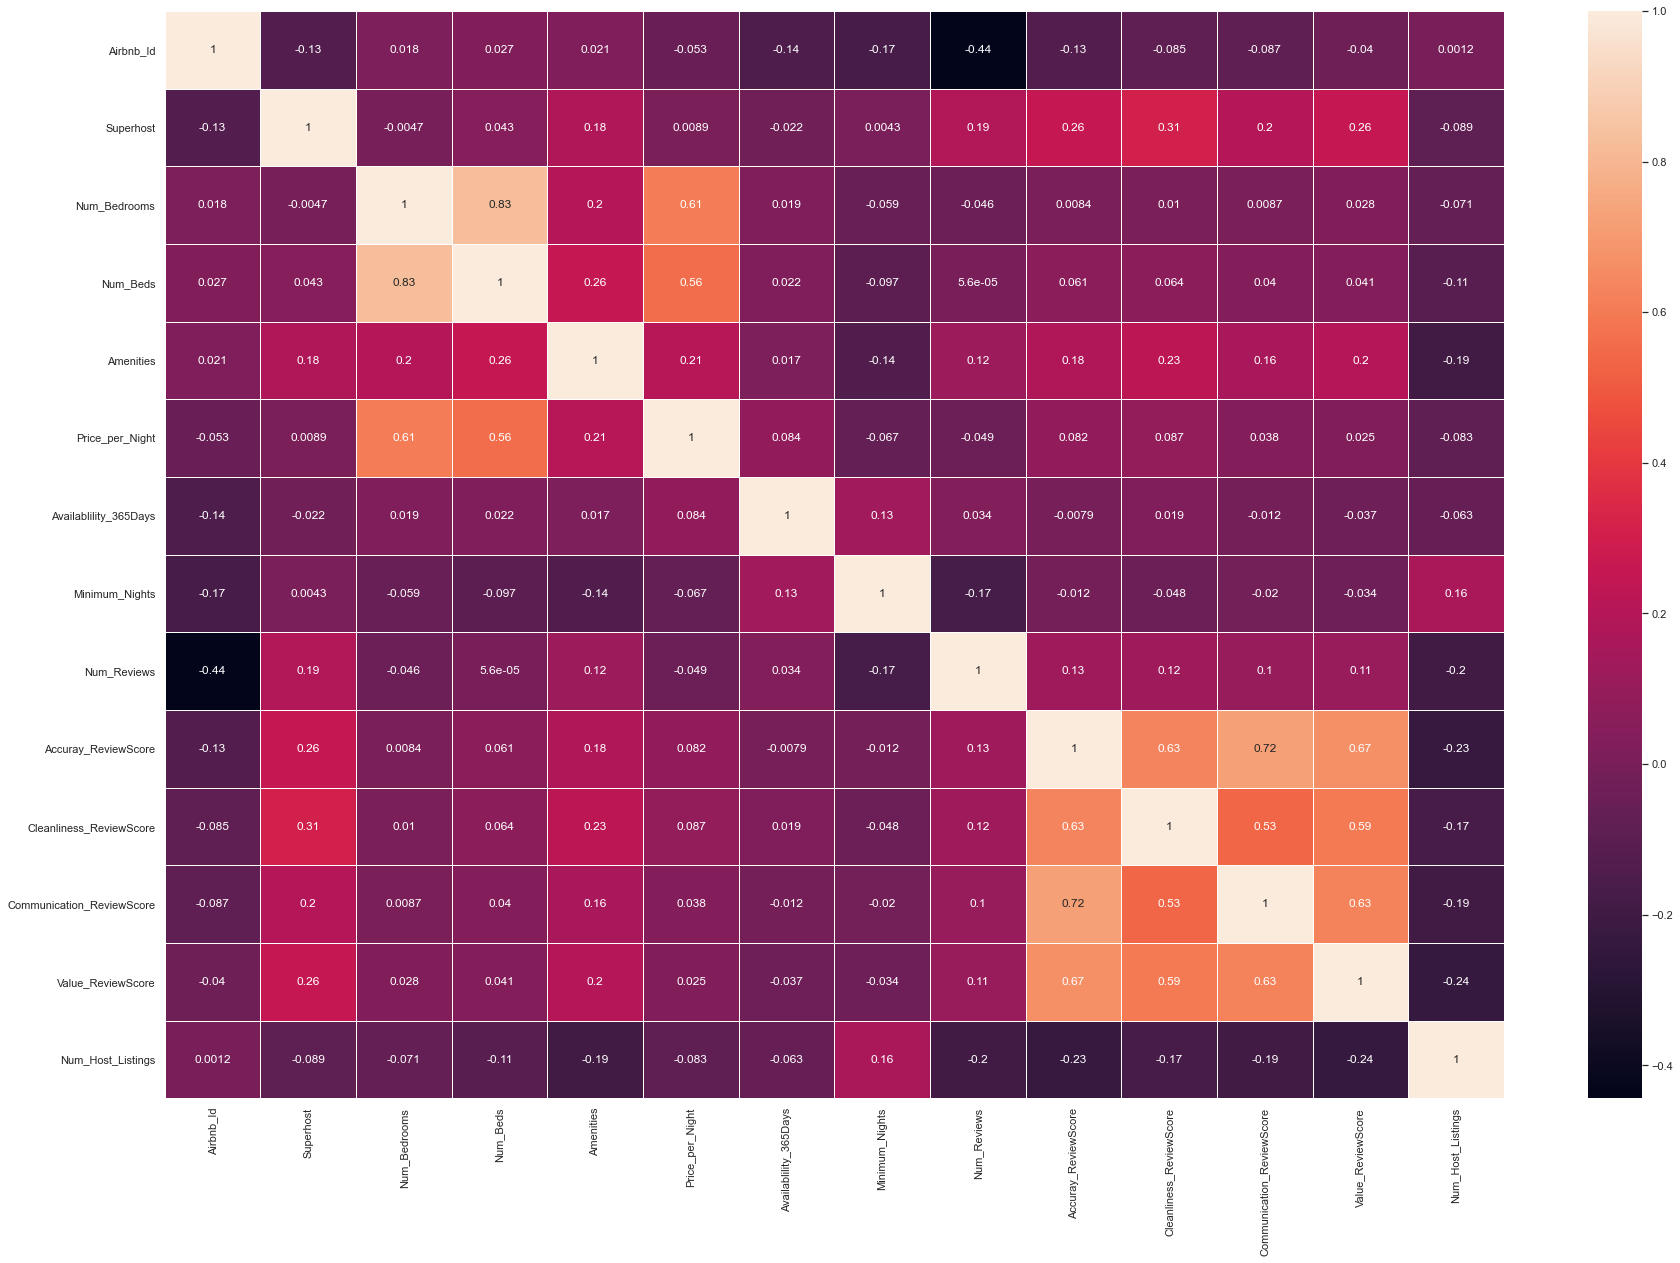

In [3]:
# EDA

# Trying to understand meta-information about my data

df.shape

df.head()

# I checked the statistical data for all the columns and nothing stands out as mistyping or an error, data seems clean
df.describe()

# Just trying to understand how many different unique neighbourhoods and response times can be for further analyisis later
len(df.Neighbourhood.unique())

len(df.Amenities.unique())

df.Host_ResponseTime.unique()

df.columns

# Plotting a correlation plot to see relation between all the different variables

sns.set(rc={'figure.figsize':(30,20)})
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5)

So interestingly num of beds, bedrooms and amenities have a **high correlation** with the price of Airbnb, which seems obvious since more rooms 
usually that means it might be the whole apt or a house and they are usually more expensive to book

<AxesSubplot:xlabel='Superhost', ylabel='Price_per_Night'>

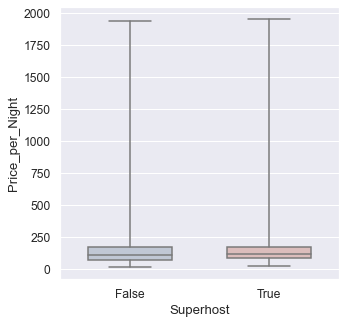

In [4]:
# There are more factors that could lead to a fluctuation in price, these might include superhost, location
# minimum nights, and property type, that might need more digging using other plots

sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")
sns.despine()
sns.set_theme(font_scale=1.1)

sns.boxplot(x="Superhost", y="Price_per_Night", data=df,
            whis=[0, 100], width=.6, palette="vlag")

Hmmm weirdly enough after counting the values of superhost vs the normal host and checking stats it seems
they have almost *similar* values, so I guess that can be crossed out as a factor to affect prices of Airbnb's

<AxesSubplot:xlabel='Price_per_Night', ylabel='Neighbourhood'>

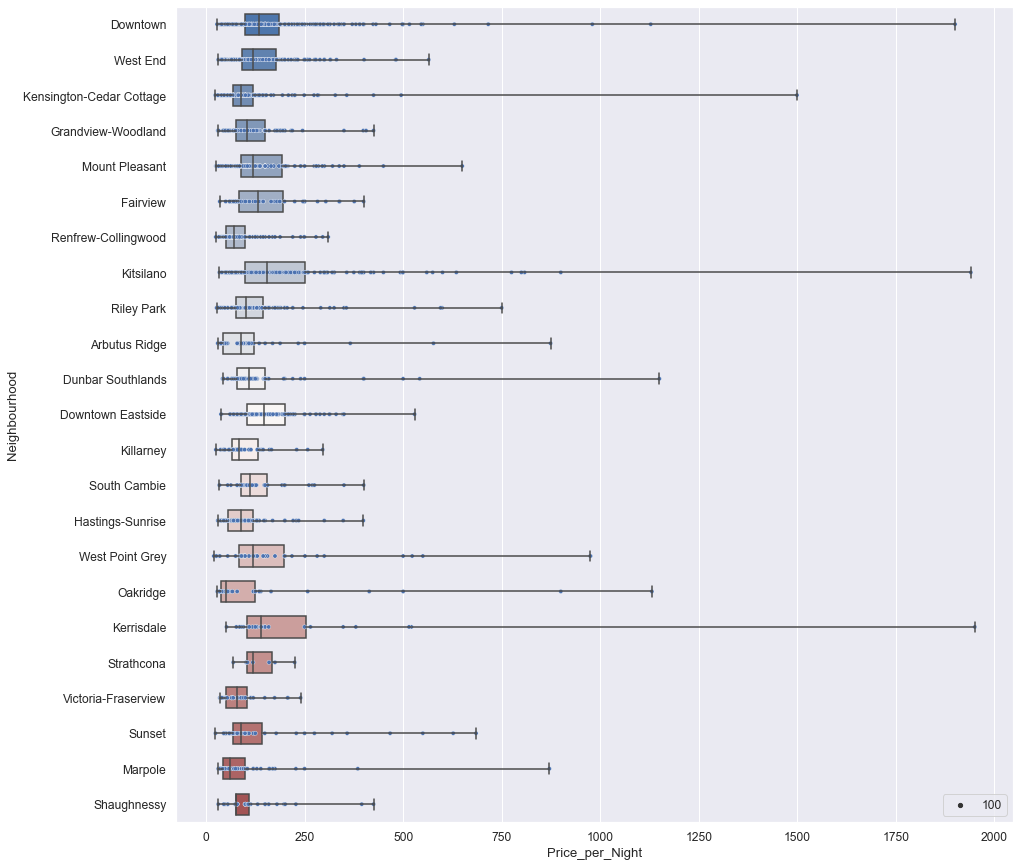

In [5]:
# Checking for different locations in Vancouver reveals there might be a slight relation between prices and locations
# All of them have their medians and IQR fall close to the same price range besides certain ones like Kitsilano, Kerrisdale
# and downtown which seem further up in price and their max is heigher too
# 

import pandas as pd

sns.set(rc={'figure.figsize':(15,15)})
sns.set_style("white")
sns.despine()
sns.set_theme(font_scale=1.1)

sns.boxplot(y="Neighbourhood", x="Price_per_Night", data=df,
            whis=[0, 100], width=.6, palette="vlag")
sns.scatterplot(y="Neighbourhood", x="Price_per_Night", data=df, palette="dark:#fff", size=(100))

The range of values for boxplots might need to decreased like prices between 0 and 500, to reveal a better correlation visual 
Since right now the outliers give effect of no correlation as they stretch the box plots

<AxesSubplot:xlabel='Price_per_Night', ylabel='Neighbourhood'>

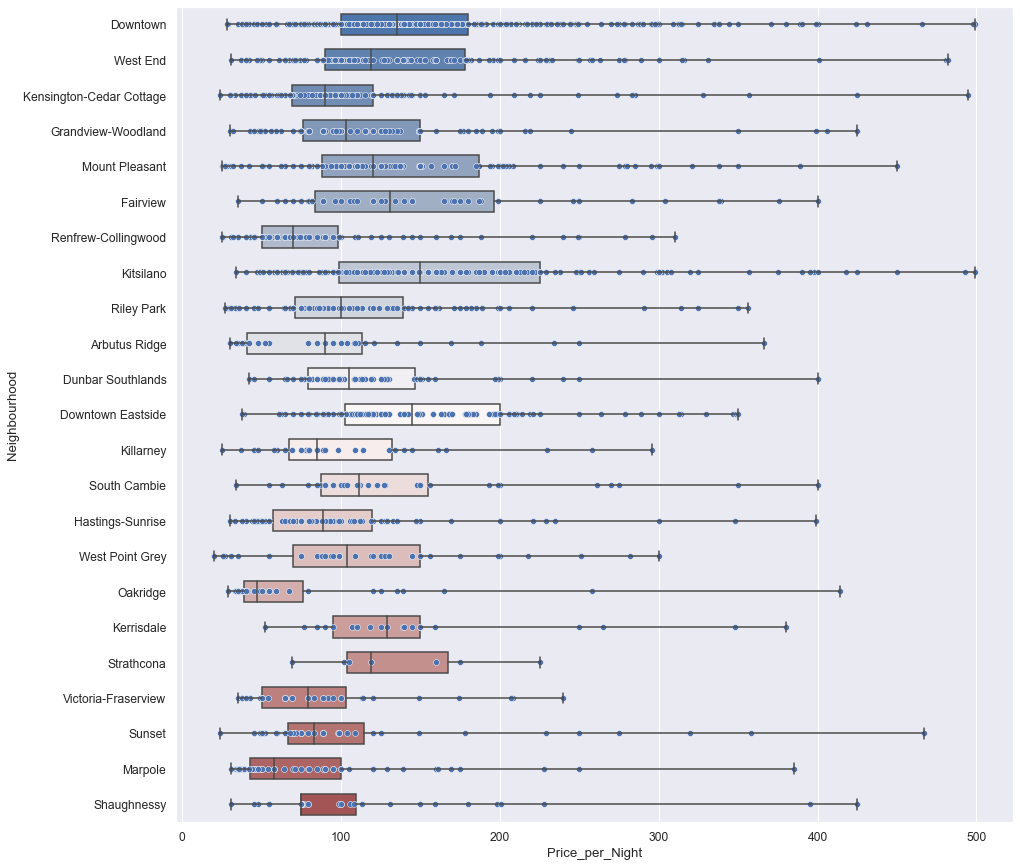

In [6]:
df2 = df.loc[lambda row: row["Price_per_Night"] < 500]
pd.DataFrame(df2).reset_index()
sns.boxplot(y="Neighbourhood", x="Price_per_Night", data=df2,
             whis=[0, 100], width=.6, palette="vlag")
sns.scatterplot(y="Neighbourhood", x="Price_per_Night", data=df2, palette="dark:#fff")

This is much better now, I can see the boxplots much more clearly with greater distinction between prices based on location.
The same relation holds true, where places closer to downtown are expensive and also have more bookings

<AxesSubplot:xlabel='Neighbourhood'>

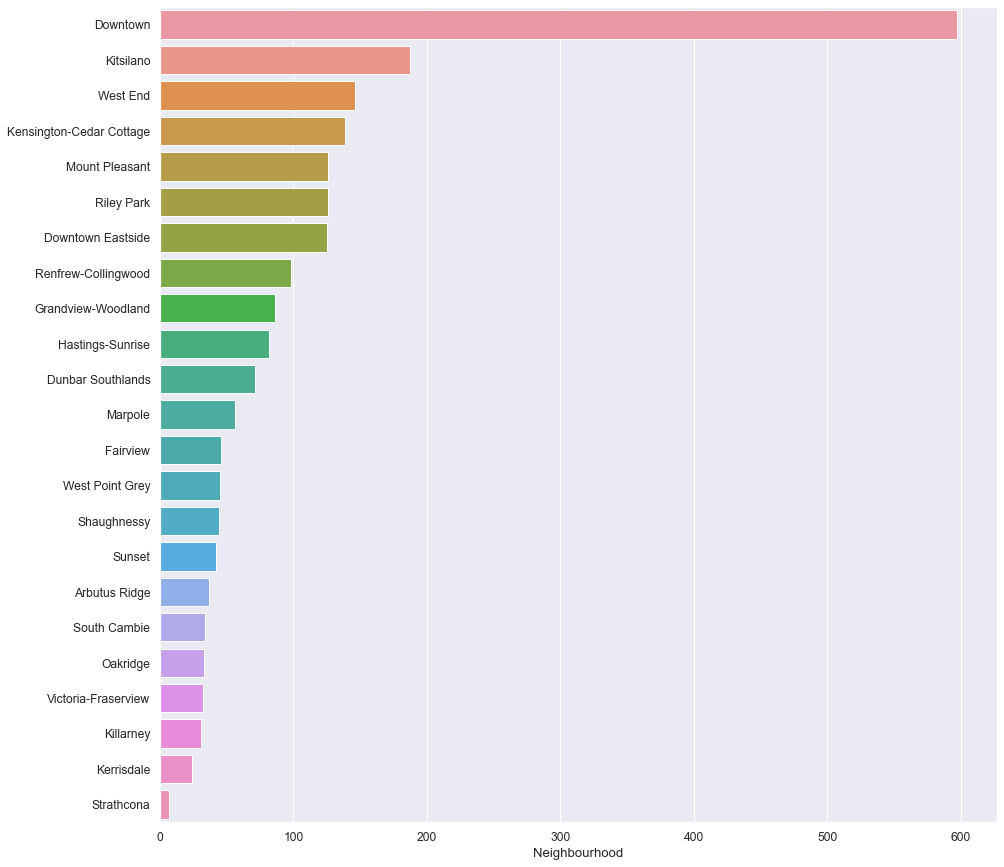

In [7]:
# While fidling with graphs above, I uncovered another important relation from my data about the popularity of Airbnb with
# location

sns.barplot(y=df["Neighbourhood"].value_counts().index, x=df["Neighbourhood"].value_counts(), data=df)

This means that Airbnbs closer to **Downtown** is booked way more than  other Airbnb's further away from DT. 
This can also imply there might be more Airbnb's near downtown than the rest of Vancouver where there might be less short term rentals

<AxesSubplot:xlabel='Price_per_Night', ylabel='Property_Type'>

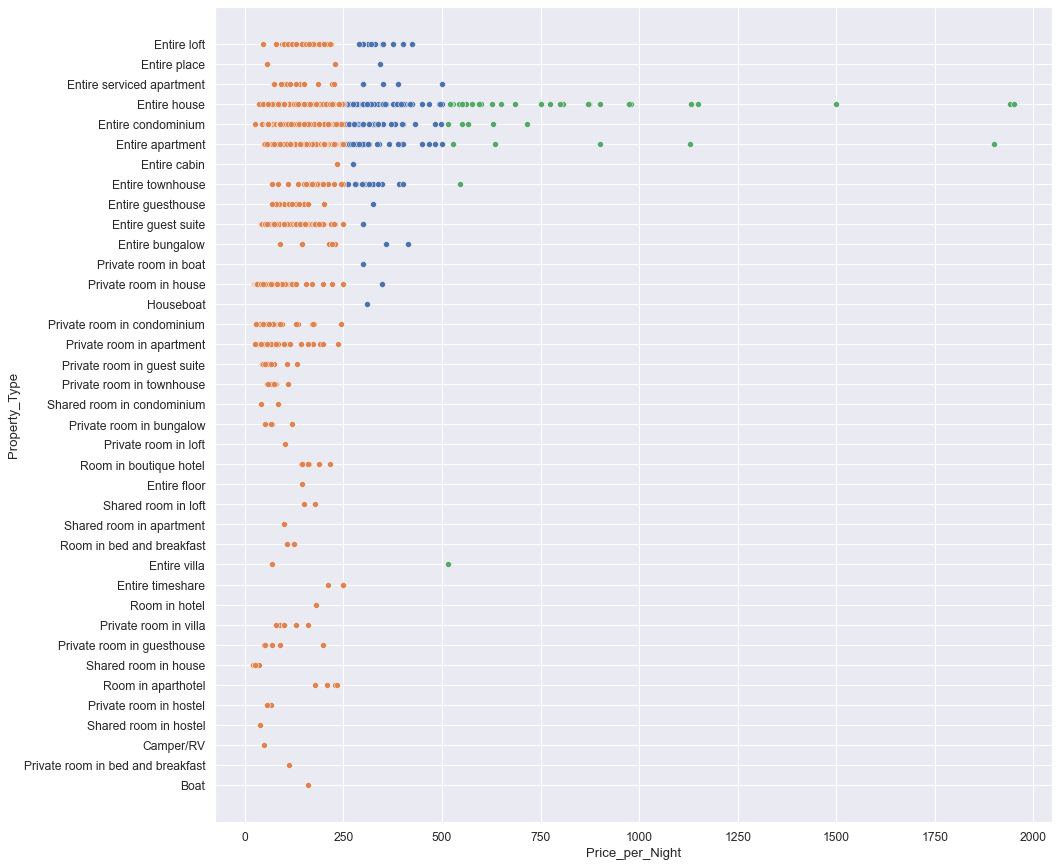

In [8]:
df3 = df[(df["Price_per_Night"] > 250) & (df["Price_per_Night"] < 500)]
df4 = df.loc[lambda row: row["Price_per_Night"] < 250 ]
df5 = df.loc[lambda row: row["Price_per_Night"] > 500]

pd.DataFrame(df3).reset_index()
pd.DataFrame(df4).reset_index()
pd.DataFrame(df5).reset_index()

sns.scatterplot(y="Property_Type", x="Price_per_Night", data=df3)
sns.scatterplot(y="Property_Type", x="Price_per_Night", data=df4)
sns.scatterplot(y="Property_Type", x="Price_per_Night", data=df5)

Plotting three scatterplots for various price points, we see that certain properties have much higher price ranges than others
These include **Entire houses, Entire condos, Entire aprtments, usually entire properties** which makes sense, since most people including msyelf prefer privacy and are willing to pay extra price if the difference isn't that much

But other factors like size of property, amenities can also be involved